In [47]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Crippen, Lipinski, Descriptors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import rdkit.Chem.Fragments as Fragments
import rdkit.Chem as Chem
import rdkit.Chem.Crippen as Crippen
import rdkit.Chem.Lipinski as Lipinski
import rdkit.Chem.rdMolDescriptors as MolDescriptors
import rdkit.Chem.Descriptors as Descriptors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.decomposition import PCA
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process import GaussianProcessRegressor
from scipy.stats import norm
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C ,WhiteKernel as Wht,Matern as matk


# Load the dataset
df = pd.read_csv('gdb9_G4MP2_withdata_hydrogenation_clean.csv')

# Display the first few rows of the dataframe to understand its structure
print(df.head())



# Assuming df contains your dataset


def evaluate_chem_mol(mol):
    mol_sssr = Chem.GetSSSR(mol)
    clogp    = Crippen.MolLogP(mol)
    mr       = Crippen.MolMR(mol)
    mw       = MolDescriptors.CalcExactMolWt(mol)
    tpsa    = MolDescriptors.CalcTPSA(mol)
    Chi0n    = MolDescriptors.CalcChi0n(mol)
    Chi1n    = MolDescriptors.CalcChi1n(mol)
    Chi2n    = MolDescriptors.CalcChi2n(mol)
    Chi3n    = MolDescriptors.CalcChi3n(mol)
    Chi4n    = MolDescriptors.CalcChi4n(mol)
    Chi0v    = MolDescriptors.CalcChi0v(mol)
    Chi1v    = MolDescriptors.CalcChi1v(mol)
    Chi2v    = MolDescriptors.CalcChi2v(mol)
    Chi3v    = MolDescriptors.CalcChi3v(mol)
    Chi4v    = MolDescriptors.CalcChi4v(mol)
    fracsp3  = MolDescriptors.CalcFractionCSP3(mol)
    Hall_Kier_Alpha = MolDescriptors.CalcHallKierAlpha(mol)
    Kappa1      = MolDescriptors.CalcKappa1(mol)
    Kappa2      = MolDescriptors.CalcKappa2(mol)
    Kappa3      = MolDescriptors.CalcKappa3(mol)
    LabuteASA   = MolDescriptors.CalcLabuteASA(mol)
    Number_Aliphatic_Rings = MolDescriptors.CalcNumAliphaticRings(mol)
    Number_Aromatic_Rings = MolDescriptors.CalcNumAromaticRings(mol)
    Number_Amide_Bonds = MolDescriptors.CalcNumAmideBonds(mol)
    Number_Atom_Stereocenters = MolDescriptors.CalcNumAtomStereoCenters(mol)
    Number_BridgeHead_Atoms = MolDescriptors.CalcNumBridgeheadAtoms(mol)
    Number_HBA = MolDescriptors.CalcNumHBA(mol)
    Number_HBD = MolDescriptors.CalcNumHBD(mol)
    Number_Hetero_Atoms = MolDescriptors.CalcNumHeteroatoms(mol)
    Number_Hetero_Cycles = MolDescriptors.CalcNumHeterocycles(mol)
    Number_Rings = MolDescriptors.CalcNumRings(mol)
    Number_Rotatable_Bonds = MolDescriptors.CalcNumRotatableBonds(mol)
    Number_Spiro = MolDescriptors.CalcNumSpiroAtoms(mol)
    Number_Saturated_Rings = MolDescriptors.CalcNumSaturatedRings(mol)
    Number_Heavy_Atoms = Lipinski.HeavyAtomCount(mol)
    Number_NH_OH = Lipinski.NHOHCount(mol)
    Number_N_O = Lipinski.NOCount(mol)
    Number_Valence_Electrons = Descriptors.NumValenceElectrons(mol)
    Max_Partial_Charge = Descriptors.MaxPartialCharge(mol)
    Min_Partial_Charge = Descriptors.MinPartialCharge(mol)

    return mol_sssr, clogp, mr, mw, tpsa, Chi0n, Chi1n, Chi2n, Chi3n, Chi4n, Chi0v, Chi1v, Chi2v, Chi3v, Chi4v, fracsp3, Hall_Kier_Alpha,Kappa1, Kappa2, Kappa3, LabuteASA, Number_Aliphatic_Rings, Number_Aromatic_Rings, Number_Amide_Bonds, Number_Atom_Stereocenters, Number_BridgeHead_Atoms, Number_HBA, Number_HBD, Number_Hetero_Atoms, Number_Hetero_Cycles, Number_Rings, Number_Rotatable_Bonds, Number_Spiro, Number_Saturated_Rings, Number_Heavy_Atoms, Number_NH_OH, Number_N_O, Number_Valence_Electrons, Max_Partial_Charge, Min_Partial_Charge


def compute_descriptors_for_dataframe(df, smiles_column):
    # Initialize lists to hold descriptors
    descriptors = []

    # Loop through SMILES strings in the dataframe
    for smiles in df[smiles_column]:
        mol = Chem.MolFromSmiles(smiles)
        if mol:  # check if mol conversion is successful
            descriptors.append(evaluate_chem_mol(mol))
        else:
            # Append None or NaN for molecules that fail conversion
            descriptors.append([None]*40)  # 40 being the number of descriptors

    # Convert list of descriptors to DataFrame
    desc_df = pd.DataFrame(descriptors, columns=[
        'mol_sssr', 'clogp', 'mr', 'mw', 'tpsa', 'Chi0n', 'Chi1n', 'Chi2n', 'Chi3n', 'Chi4n', 
        'Chi0v', 'Chi1v', 'Chi2v', 'Chi3v', 'Chi4v', 'fracsp3', 'Hall_Kier_Alpha','Kappa1', 
        'Kappa2', 'Kappa3', 'LabuteASA', 'Number_Aliphatic_Rings', 'Number_Aromatic_Rings', 
        'Number_Amide_Bonds', 'Number_Atom_Stereocenters', 'Number_BridgeHead_Atoms', 'Number_HBA', 
        'Number_HBD', 'Number_Hetero_Atoms', 'Number_Hetero_Cycles', 'Number_Rings', 'Number_Rotatable_Bonds', 
        'Number_Spiro', 'Number_Saturated_Rings', 'Number_Heavy_Atoms', 'Number_NH_OH', 'Number_N_O', 
        'Number_Valence_Electrons', 'Max_Partial_Charge', 'Min_Partial_Charge'
    ])
    
    return pd.concat([df, desc_df], axis=1)

# Compute descriptors for the entire dataset
df = compute_descriptors_for_dataframe(df, 'unsat_SMILE')

delta_H_nH2 = df['delta_H'] * df['nH2']


# Split data into training and test sets
X = df.iloc[:, -40:].values  # Last 40 columns should be descriptors
#y = df['delta_H'].values
y = delta_H_nH2.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Train a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

# Calculate MSE and RMSD
mse = mean_squared_error(y_test, y_pred)
rmsd = mean_squared_error(y_test, y_pred, squared=False)  # If squared=False, it returns RMSE

print(f'MSE: {mse}')
print(f'RMSD: {rmsd}')

# Model Performance (R^2 Score)
r2 = lr.score(X_test, y_test)
print(f'R^2 Score: {r2}')


  unsat_SMILE sat_SMILE     delta_H  nH2    pH2
0         C#C        CC  150.735206    2  13.42
1         C=O        CO   83.774454    1   6.29
2        CC#C       CCC  139.811813    2   9.15
3        CC=O       CCO   63.227291    1   4.38
4     CC(C)=O    CC(C)O   51.916637    1   3.36
MSE: 542.6589112261372
RMSD: 23.29504048560846
R^2 Score: 0.9578088861699924


In [66]:
print(y_test.var())   # Shouldn't be (or very close to) 0


12861.924276580286


In [27]:
print(df.duplicated().sum())  # Should be 0


0


In [68]:
print(X_test.var(axis=0))


[1.48427371e+00 1.00165272e+00 1.24206344e+01 5.93086351e+01
 2.54860400e+02 2.55995571e-01 1.65181947e-01 4.23797191e-01
 6.66982014e-01 6.23066137e-01 2.55995571e-01 1.65181947e-01
 4.23797191e-01 6.66982014e-01 6.23066137e-01 1.81542184e-02
 3.42971341e-02 1.38606425e+00 1.18888601e+00 1.50169920e+00
 1.08002096e+01 1.51725092e+00 1.42174572e-02 0.00000000e+00
 1.87388052e+00 1.04424608e+00 8.59086018e-01 4.16343706e-01
 8.71068826e-01 8.35128299e-01 1.48427371e+00 1.30329071e+00
 9.65440834e-02 1.43113422e+00 2.66840430e-01 4.16343706e-01
 8.58466970e-01 1.14970371e+01 3.48517210e-03 8.13629468e-03]


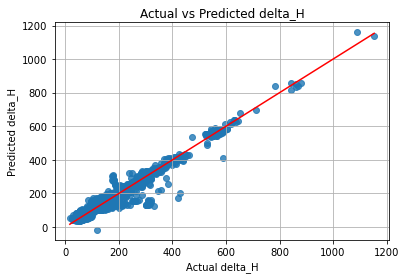

In [67]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.8)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')  # Perfect prediction line

plt.xlabel('Actual delta_H')
plt.ylabel('Predicted delta_H')
plt.title('Actual vs Predicted delta_H')
plt.grid(True)
plt.show()

In [69]:
correlation = df.corr()
print(correlation['delta_H'].sort_values(ascending=False))


delta_H                      1.000000
pH2                          0.289054
mr                           0.278584
nH2                          0.277372
clogp                        0.233682
Min_Partial_Charge           0.189744
Number_Aliphatic_Rings       0.176705
mol_sssr                     0.172310
Number_Rings                 0.172310
Chi4n                        0.148085
Chi4v                        0.148085
Chi1v                        0.144402
Chi1n                        0.144402
LabuteASA                    0.123236
Number_BridgeHead_Atoms      0.109037
Chi3n                        0.087738
Chi3v                        0.087738
Number_Atom_Stereocenters    0.067647
Chi2v                        0.055343
Chi2n                        0.055343
Number_Hetero_Cycles         0.036774
Kappa3                       0.029771
Chi0v                        0.026384
Chi0n                        0.026384
Number_Heavy_Atoms           0.017086
Number_Spiro                 0.014025
Kappa2      

In [70]:
def predict_new_smiles(smiles, model):
    # Convert SMILES to Mol object
    mol = Chem.MolFromSmiles(smiles)
    
    if not mol:
        return "Invalid SMILES string."
    
    # Compute descriptors for the molecule
    descriptors = evaluate_chem_mol(mol)
    
    # Convert descriptors to a format suitable for prediction
    # Here, we assume that the model expects a 2D array-like structure
    descriptors_reshaped = np.array(descriptors).reshape(1, -1)
    
    # Make a prediction
    prediction = model.predict(descriptors_reshaped)
    
    return prediction[0]  # Since we only have one prediction, we extract the first element

# Use the function to predict for the new SMILES string
new_smiles = 'c1ccccc1'
predicted_delta_H = predict_new_smiles(new_smiles, lr)
print(f"Predicted delta_H for {new_smiles}: {predicted_delta_H}")


Predicted delta_H for c1ccccc1: 266.83559051717845


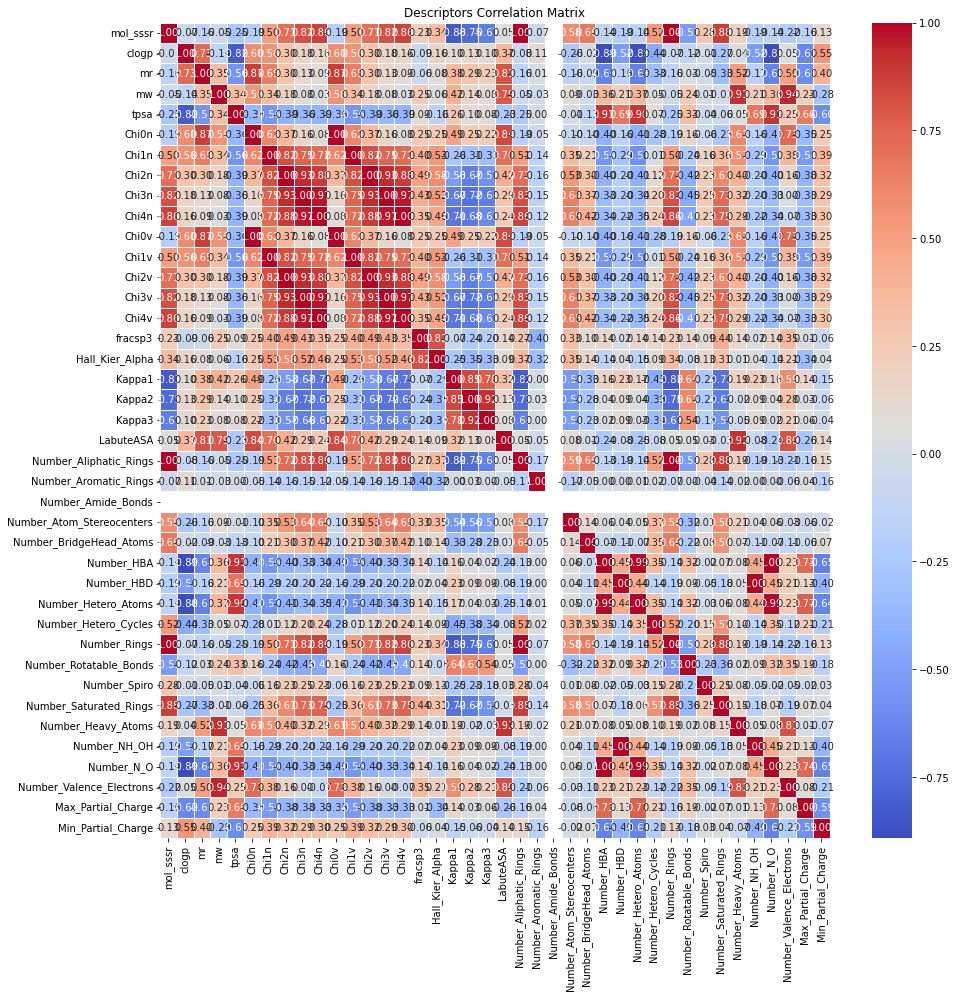

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the descriptors columns from the DataFrame
descriptors_df = df.iloc[:, -40:]  # Assuming the last 40 columns are your descriptors

# Calculate the correlation matrix
correlation_matrix = descriptors_df.corr()

# Display using a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Descriptors Correlation Matrix")
plt.show()
